In [3]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import glob
import tools21cm as t2c
import cmasher as cmr
plt.rcParams['font.size'] = 12
save = False
plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':10})

In [4]:
zc = 63
N = 128
boxsize = 14 # kpc
extent = (0,boxsize,0,boxsize)

In [26]:
files_c2ray = [
    'c2ray_results/Teff=5e4/xfrac3D_8.835.bin'
]
files_pyc2ray = [
    'pyc2ray_results/Teff=5e4/xfrac_8.835.pkl'
]

files_c2ray_irate = [
    'c2ray_results/Teff=5e4/IonRates3D_8.835.bin'
]
files_pyc2ray_irate = [
    'pyc2ray_results/Teff=5e4/IonRates_8.835.pkl'
]

In [27]:
numslices = 1
slices_c2ray = np.empty((numslices,N,N))
slices_pyc2ray = np.empty((numslices,N,N))
meanxfrac_c2ray = np.empty(numslices)
meanxfrac_pyc2ray = np.empty(numslices)

slices_c2ray_irate = np.empty((numslices,N,N))
slices_pyc2ray_irate = np.empty((numslices,N,N))

for i,f in enumerate(files_c2ray):
    x = t2c.XfracFile(f).xi
    slices_c2ray[i] = x[:,:,zc]
    meanxfrac_c2ray[i] = x.mean()
    
for i,f in enumerate(files_pyc2ray):
    with open(f,"rb") as f:
        x = pkl.load(f)
    slices_pyc2ray[i] = x[:,:,zc]
    meanxfrac_pyc2ray[i] = x.mean()

for i,f in enumerate(files_c2ray_irate):
    phi = t2c.IonRateFile(f).irate
    slices_c2ray_irate[i] = phi[:,:,zc]
    
for i,f in enumerate(files_pyc2ray_irate):
    with open(f,"rb") as f:
        phi = pkl.load(f)
    slices_pyc2ray_irate[i] = phi[:,:,zc]

In [7]:
print(meanxfrac_c2ray)
print(meanxfrac_pyc2ray)

[0.03772156]
[0.03772155]


In [40]:
err = np.empty((numslices,N,N))
err_irate = np.empty((numslices,N,N))

for u in range(numslices):
    err[u] = (slices_pyc2ray[u]-slices_c2ray[u]) / slices_c2ray[u]*100
    err_irate[u] = (slices_pyc2ray_irate[u]-slices_c2ray_irate[u]) / slices_c2ray_irate[u]*100

In [54]:
err.max()

0.008385141365799242

In [63]:
vmin_x = slices_c2ray[0].min()
vmax_x = slices_c2ray[0].max()
cmap_x = 'jet'#'cmr.guppy_r'

vmin_r = -0.003
vmax_r = 0.003
cmap_r = 'RdBu'

vmin_irate = slices_c2ray_irate[0].min()
vmax_irate = slices_c2ray_irate[0].max()
cmap_irate = 'inferno'

def xfracplot(x,ax):
    return ax.imshow(x,norm='log',cmap=cmap_x,vmin=vmin_x,vmax=vmax_x,extent=extent,origin='lower')
def ionrateplot(x,ax):
    return ax.imshow(x,norm='log',cmap=cmap_irate,vmin=vmin_irate,vmax=vmax_irate,extent=extent,origin='lower')
def residplot(err,ax):
    return ax.imshow(err,cmap=cmap_r,vmin=vmin_r,vmax=vmax_r,extent=extent,origin='lower')

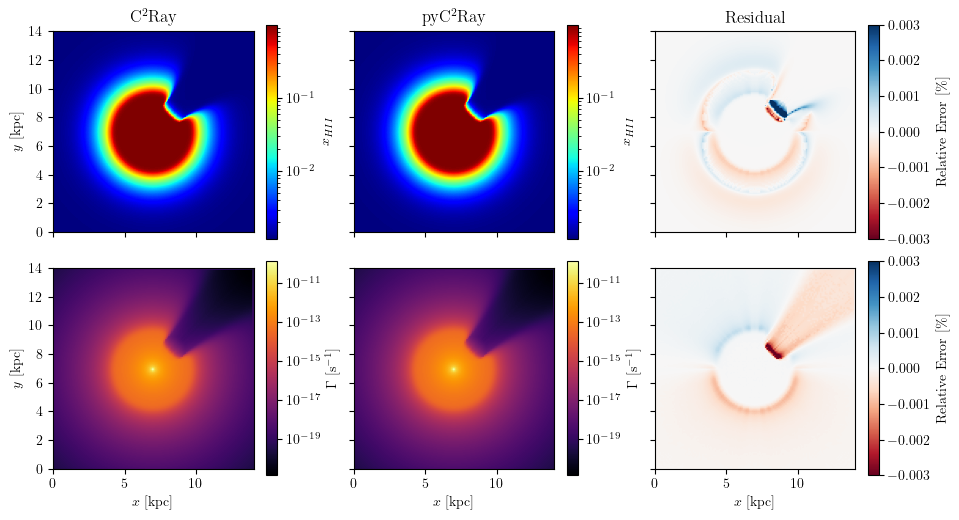

In [64]:
fig, ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(11,6))

im1 = xfracplot(slices_c2ray[0],ax[0,0])
im2 = xfracplot(slices_pyc2ray[0],ax[0,1])
res1 = residplot(err[0],ax[0,2])

im3 = ionrateplot(slices_c2ray_irate[0],ax[1,0])
im4 = ionrateplot(slices_pyc2ray_irate[0],ax[1,1])
res2 = residplot(err_irate[0],ax[1,2])

ax[1,0].set_xlabel('$x$ [kpc]')
ax[1,1].set_xlabel('$x$ [kpc]')
ax[1,2].set_xlabel('$x$ [kpc]')
ax[0,0].set_ylabel('$y$ [kpc]')
ax[1,0].set_ylabel('$y$ [kpc]')

shrk = 0.95
cb1 = fig.colorbar(im1,ax=ax[0,0],shrink=shrk)
cb1.set_label("$x_{HII}$")
cb2 = fig.colorbar(im2,ax=ax[0,1],shrink=shrk)
cb2.set_label("$x_{HII}$")

cb3 = fig.colorbar(im3,ax=ax[1,0],shrink=shrk)
cb3.set_label("$\Gamma$ [s$^{-1}$]")
cb4 = fig.colorbar(im4,ax=ax[1,1],shrink=shrk)
cb4.set_label("$\Gamma$ [s$^{-1}$]")

cbres1 = fig.colorbar(res1,ax=ax[0,2],shrink=shrk)
cbres1.set_label("Relative Error [\%]")
cbres2 = fig.colorbar(res2,ax=ax[1,2],shrink=shrk)
cbres2.set_label("Relative Error [\%]")

ax[0,0].set_title("C$^2$Ray")
ax[0,1].set_title("pyC$^2$Ray")
ax[0,2].set_title("Residual")

fig.subplots_adjust(hspace=0.05)

In [65]:
fig.savefig("comparison.eps",bbox_inches='tight')

## Tests for shadow

In [46]:
avgdens = 1e-3
xc = np.linspace(0,14,N)
X,Y,Z = np.meshgrid(xc,xc,xc)
shadow_pos = np.array([44,44,64])
shadow_radius = 8
shadow_fact = 10
ndens = avgdens*np.ones((N,N,N))
for i in range(0,N):
    for j in range(0,N):
        for k in range(0,N):
            if (i-shadow_pos[0])**2 + (j-shadow_pos[1])**2 + (k-shadow_pos[2])**2 < shadow_radius**2:
                ndens[i,j,k] = shadow_fact*avgdens

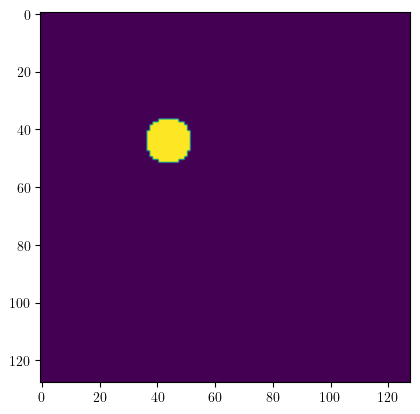

In [47]:
plt.imshow(ndens[:,:,64])

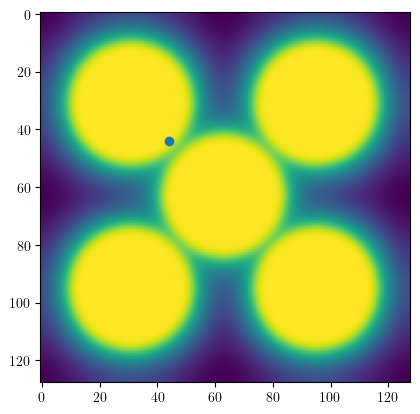

In [48]:
plt.imshow(slices_c2ray[2],norm='log')
plt.scatter(shadow_pos[0],shadow_pos[1])